# Imports

In [2]:
import math
import os
import sys
import pandas as pd
sys.path.append("/home/weber/PycharmProjects/EXOTIC/src")
from statannot import add_stat_annotation

pd.options.mode.chained_assignment = None  # default='warn'
import multiprocessing
import parmap
import numpy as np
import collections
from tqdm import tqdm
import pandarallel
from pandarallel import pandarallel

pandarallel.initialize(nb_workers=20, progress_bar=True)
# tqdm.pandas()
from pprint import pprint
from scipy.stats import zscore
from scipy import stats

import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
from matplotlib.colors import LogNorm
import json
import matplotlib.ticker as mtick
from utils.utils import load_config_file

## YAML FILES CONFIG
yaml = load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/src/config.yaml")
exotic_files = yaml

import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


# Load files

## All corrected Genes

In [ ]:
exotic_processed.loc[exotic_processed['MAP'] == 'ACSM5_20448590-20448689'].to_dict()

In [ ]:
exotic_processed.loc[exotic_processed['MAP'] == 'ACSM5_20448590-20448689'].to_dict()

In [ ]:
exotic_processed.loc[exotic_processed['MAP'] == 'ZNF257_22270781-22272244'].to_dict()

In [23]:
refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['Gene'] == 'A2M']

,Gene,ranges,new_mRNA_exons,new_mRNA_nb,new_mRNA_gene,new_mRNA_nb_total,new_Ratio,new_Ratio_num,Const_Alt,new_Ratio_num_bins,Start,End,Length,new_CDS_count,Gene_type,MAP,ENST_exons,ENST_exons_nb,Check_diff_NM_ENST_nb
0,A2M,9220419-9220435,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,4/4,1.00,Const,0.8 - 1,9220419,9220435,16,38,Multi Isoform,A2M_9220419-9220435,[ENST00000318602],1,False
1,A2M,9220779-9220820,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,4/4,1.00,Const,0.8 - 1,9220779,9220820,41,38,Multi Isoform,A2M_9220779-9220820,[ENST00000318602],1,False
2,A2M,9221336-9221438,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,4/4,1.00,Const,0.8 - 1,9221336,9221438,102,38,Multi Isoform,A2M_9221336-9221438,[ENST00000318602],1,False
3,A2M,9222341-9222409,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,4/4,1.00,Const,0.8 - 1,9222341,9222409,68,38,Multi Isoform,A2M_9222341-9222409,[ENST00000318602],1,False
4,A2M,9223084-9223174,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,4/4,1.00,Const,0.8 - 1,9223084,9223174,90,38,Multi Isoform,A2M_9223084-9223174,[ENST00000318602],1,False
5,A2M,9224955-9225082,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,4/4,1.00,Const,0.8 - 1,9224955,9225082,127,38,Multi Isoform,A2M_9224955-9225082,[ENST00000318602],1,False
6,A2M,9225249-9225467,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,4/4,1.00,Const,0.8 - 1,9225249,9225467,218,38,Multi Isoform,A2M_9225249-9225467,[ENST00000318602],1,False
7,A2M,9227156-9227379,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,4/4,1.00,Const,0.8 - 1,9227156,9227379,223,38,Multi Isoform,A2M_9227156-9227379,[ENST00000318602],1,False
8,A2M,9229352-9229532,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,4/4,1.00,Const,0.8 - 1,9229352,9229532,180,38,Multi Isoform,A2M_9229352-9229532,[ENST00000318602],1,False
9,A2M,9229942-9230016,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,"[NM_001347423, NM_001347425, NM_000014, NM_001...",4,4/4,1.00,Const,0.8 - 1,9229942,9230016,74,38,Multi Isoform,A2M_9229942-9230016,[ENST00000318602],1,False


In [25]:
exotic_processed = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_modified_zscore.parquet')
exotic_processed.loc[exotic_processed['symbol'] == 'A2M']

,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,Thyroid,Uterus,Vagina,Whole Blood,EXOTIC_down,EXOTIC_bins_down,EXOTIC_tissues_down,EXOTIC_up,EXOTIC_bins_up,EXOTIC_tissues_up
13,A2M,ENSG00000175899,7,9264755-9264787,0.25,1,4,A2M_9264755-9264787,0.63865,0.523732,...,0.5025,0.50475,0.49525,0.4955,0.667966,0.65 - 0.7,[Liver],0.59025,0.55 - 0.6,[Cells - Cultured fibroblasts]
14,A2M,ENSG00000175899,7,9264973-9265102,0.25,1,4,A2M_9264973-9265102,0.63865,0.523732,...,0.5025,0.50475,0.49525,0.4955,0.667966,0.65 - 0.7,[Liver],0.59025,0.55 - 0.6,[Cells - Cultured fibroblasts]
15,A2M,ENSG00000175899,7,9265956-9266139,0.50,2,4,A2M_9265956-9266139,0.63865,0.523732,...,0.5025,0.50475,0.49525,0.4955,0.667966,0.65 - 0.7,[Liver],0.59025,0.55 - 0.6,[Cells - Cultured fibroblasts]
16,A2M,ENSG00000175899,7,9268360-9268445,0.50,2,4,A2M_9268360-9268445,0.63865,0.523732,...,0.5025,0.50475,0.49525,0.4955,0.667966,0.65 - 0.7,[Liver],0.59025,0.55 - 0.6,[Cells - Cultured fibroblasts]


In [17]:
biomart = pd.read_csv('/gstock/EXOTIC/data/GENOMICS/biomart_37.txt.gz', compression='gzip', sep='\t')

refseq_corrected_by_gtex = pd.read_parquet('/gstock/EXOTIC/data/GENOMICS/RefSeq_corrected_by_GTEx_lite.parquet')
refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['new_mRNA_nb_total'] == 1, 'Gene_type'] = 'Single Isoform'
refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['new_mRNA_nb_total'] > 1, 'Gene_type'] = 'Multi Isoform'
refseq_corrected_by_gtex['MAP'] = refseq_corrected_by_gtex.Gene + '_' + refseq_corrected_by_gtex.ranges.astype(str)
refseq_corrected_by_gtex.head()

dict_nm_enst = biomart[['RefSeq mRNA ID', 'Transcript stable ID']].dropna().set_index('RefSeq mRNA ID').to_dict()['Transcript stable ID']


def convert_refseq_nm_to_enst(r):
    def map_enst(nm):
        try: 
            return dict_nm_enst[nm]
        except KeyError:
            pass
    return [e for e in list(map(map_enst, r)) if e is not None]
        
            
tqdm.pandas()
refseq_corrected_by_gtex['ENST_exons'] = refseq_corrected_by_gtex['new_mRNA_exons'].progress_apply(convert_refseq_nm_to_enst)
refseq_corrected_by_gtex['ENST_exons_nb'] = refseq_corrected_by_gtex['ENST_exons'].apply(len)
refseq_corrected_by_gtex['Check_diff_NM_ENST_nb'] = refseq_corrected_by_gtex.apply(lambda r: True if r['ENST_exons_nb'] == r['new_mRNA_nb'] else False, axis=1)

refseq_corrected_by_gtex = refseq_corrected_by_gtex.loc[refseq_corrected_by_gtex['ENST_exons_nb'] > 0]

refseq_corrected_by_gtex.head()


exotic_processed = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_modified_zscore.parquet')

exotic_processed_test = pd.merge(exotic_processed, refseq_corrected_by_gtex[['MAP', 'ENST_exons', 'new_mRNA_exons']], on='MAP')
exotic_processed_test


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 176799/176799 [00:01<00:00, 167628.04it/s]


,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,Vagina,Whole Blood,EXOTIC_down,EXOTIC_bins_down,EXOTIC_tissues_down,EXOTIC_up,EXOTIC_bins_up,EXOTIC_tissues_up,ENST_exons,new_mRNA_exons
0,A2ML1,ENSG00000166535,23336,8975248-8975309,0.500000,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,0.500000,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[ENST00000299698],[NM_144670]
1,A2ML1,ENSG00000166535,23336,8975778-8975961,0.500000,1,2,A2ML1_8975778-8975961,0.69514,0.578349,...,0.500000,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[ENST00000299698],[NM_144670]
2,A2ML1,ENSG00000166535,23336,8976316-8976478,0.500000,1,2,A2ML1_8976316-8976478,0.69514,0.578349,...,0.500000,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[ENST00000299698],[NM_144670]
3,A2ML1,ENSG00000166535,23336,8982323-8982375,0.500000,1,2,A2ML1_8982323-8982375,0.69514,0.578349,...,0.500000,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[ENST00000299698],[NM_144670]
4,A2ML1,ENSG00000166535,23336,8987258-8987278,0.500000,1,2,A2ML1_8987258-8987278,0.69514,0.578349,...,0.500000,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O...",[ENST00000299698],[NM_144670]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20968,ZXDC,ENSG00000070476,28160,126158475-126158570,0.500000,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,0.508499,0.495250,0.542398,0.5 - 0.55,[Brain - Nucleus accumbens (basal ganglia)],0.574443,0.55 - 0.6,[Muscle - Skeletal],[ENST00000389709],[NM_025112]
20969,ZXDC,ENSG00000070476,28160,126160608-126160789,0.500000,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,0.508499,0.495250,0.542398,0.5 - 0.55,[Brain - Nucleus accumbens (basal ganglia)],0.574443,0.55 - 0.6,[Muscle - Skeletal],[ENST00000389709],[NM_025112]
20970,ZXDC,ENSG00000070476,28160,126178496-126178580,0.500000,1,2,ZXDC_126178496-126178580,0.20989,0.500250,...,0.508499,0.495250,0.542398,0.5 - 0.55,[Brain - Nucleus accumbens (basal ganglia)],0.574443,0.55 - 0.6,[Muscle - Skeletal],[ENST00000389709],[NM_025112]
20971,ZXDC,ENSG00000070476,28160,126180378-126181063,0.500000,1,2,ZXDC_126180378-126181063,0.34803,0.515245,...,0.505750,0.441272,0.558728,0.55 - 0.6,[Whole Blood],0.606828,0.6 - 0.65,[Artery - Tibial],[ENST00000389709],[NM_025112]


In [4]:
exotic_processed = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_modified_zscore.parquet')
exotic_processed

,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,Thyroid,Uterus,Vagina,Whole Blood,EXOTIC_down,EXOTIC_bins_down,EXOTIC_tissues_down,EXOTIC_up,EXOTIC_bins_up,EXOTIC_tissues_up
0,A2ML1,ENSG00000166535,23336,8975248-8975309,0.500000,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,0.578349,0.441765,0.500000,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O..."
1,A2ML1,ENSG00000166535,23336,8975778-8975961,0.500000,1,2,A2ML1_8975778-8975961,0.69514,0.578349,...,0.578349,0.441765,0.500000,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O..."
2,A2ML1,ENSG00000166535,23336,8976316-8976478,0.500000,1,2,A2ML1_8976316-8976478,0.69514,0.578349,...,0.578349,0.441765,0.500000,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O..."
3,A2ML1,ENSG00000166535,23336,8982323-8982375,0.500000,1,2,A2ML1_8982323-8982375,0.69514,0.578349,...,0.578349,0.441765,0.500000,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O..."
4,A2ML1,ENSG00000166535,23336,8987258-8987278,0.500000,1,2,A2ML1_8987258-8987278,0.69514,0.578349,...,0.578349,0.441765,0.500000,0.578349,0.713205,0.7 - 0.75,[Brain - Cerebellar Hemisphere],0.578349,0.55 - 0.6,"[Adipose - Subcutaneous, Adipose - Visceral (O..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24288,ZXDC,ENSG00000070476,28160,126158475-126158570,0.500000,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,0.501750,0.500500,0.508499,0.495250,0.542398,0.5 - 0.55,[Brain - Nucleus accumbens (basal ganglia)],0.574443,0.55 - 0.6,[Muscle - Skeletal]
24289,ZXDC,ENSG00000070476,28160,126160608-126160789,0.500000,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,0.501750,0.500500,0.508499,0.495250,0.542398,0.5 - 0.55,[Brain - Nucleus accumbens (basal ganglia)],0.574443,0.55 - 0.6,[Muscle - Skeletal]
24290,ZXDC,ENSG00000070476,28160,126178496-126178580,0.500000,1,2,ZXDC_126178496-126178580,0.20989,0.500250,...,0.501750,0.500500,0.508499,0.495250,0.542398,0.5 - 0.55,[Brain - Nucleus accumbens (basal ganglia)],0.574443,0.55 - 0.6,[Muscle - Skeletal]
24291,ZXDC,ENSG00000070476,28160,126180378-126181063,0.500000,1,2,ZXDC_126180378-126181063,0.34803,0.515245,...,0.497250,0.505250,0.505750,0.441272,0.558728,0.55 - 0.6,[Whole Blood],0.606828,0.6 - 0.65,[Artery - Tibial]


# QTL Mapping

### Mapping of all sQTLs over EXOTIC genes with the same tissue

In [ ]:
sqtlseeker_listdir

In [18]:
sqtlseeker_dir = '/gstock/biolo_datasets/QTL/sqlseeker-2/sQTLs.GTEx.V8.RSEM/'
sqtlseeker_listdir = sorted([d for d in os.listdir(sqtlseeker_dir) if 'parquet' not in d])

def mp_sqtl(tissue, l_df):
    sqtlseeker_tmp = pd.read_csv(sqtlseeker_dir + tissue + '/sqtls-0.05fdr.permuted.tsv.gz', compression='gzip', sep='\t')
    sqtlseeker_tmp = sqtlseeker_tmp.melt(id_vars=[c for c in sqtlseeker_tmp.columns if 'tr.' not in c], value_vars=['tr.first', 'tr.second'], var_name='tr_type', value_name='ENST')
    sqtlseeker_tmp.ENST = sqtlseeker_tmp.ENST.apply(lambda r: r.split('.')[0])
    sqtlseeker_tmp['Tissue'] = tissue
    sqtlseeker_tmp['gene_id'] = sqtlseeker_tmp['geneId'].apply(lambda r: r.split('.')[0])
    sqtlseeker_tmp = sqtlseeker_tmp.loc[sqtlseeker_tmp['md'] >= 0.05]
    merge = pd.merge(exotic_processed_test.explode('ENST_exons'), sqtlseeker_tmp, left_on='ENST_exons', right_on='ENST')
    l_df.append(merge)


m = multiprocessing.Manager()
l_df = m.list()
# for tissue in sqtlseeker_listdir:
parmap.starmap(mp_sqtl, list(zip(sqtlseeker_listdir)), l_df, pm_pbar=True)

exotic_sqtl = pd.concat(list(l_df)).sort_values(by=['symbol'])
# exotic_sqtl = exotic_sqtl.drop(['EXOTIC_check_pext_min', 'EXOTIC_check_pext_max'], axis=1)
# exotic_sqtl['EXOTIC_tissues_max'] = exotic_sqtl['EXOTIC_tissues_max'].astype(str)
# exotic_sqtl['EXOTIC_tissues_min'] = exotic_sqtl['EXOTIC_tissues_min'].astype(str)
# exotic_sqtl['Check_tissues_max'] = exotic_sqtl.apply(lambda r: True if r['Tissue'] in r['EXOTIC_tissues_max'] else False, axis=1)
# exotic_sqtl['Check_tissues_min'] = exotic_sqtl.apply(lambda r: True if r['Tissue'] in r['EXOTIC_tissues_min'] else False, axis=1)
exotic_sqtl.to_parquet('/gstock/EXOTIC/data/QTL/sQTL_filtered_ENST_modified_zscore_test_biomart_37.parquet')
exotic_sqtl.head()


100%|██████████| 49/49 [00:13<00:00,  3.69it/s]


,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,ENST,Tissue,gene_id,nb.perms,pv.emp
9,A2ML1,ENSG00000166535,23336,8987258-8987278,0.5,1,2,A2ML1_8987258-8987278,0.69514,0.578349,...,1.584675,10100,0.202752,0.648511,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
1,A2ML1,ENSG00000166535,23336,8975248-8975309,0.5,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,1.584675,10100,0.202752,0.648511,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
2,A2ML1,ENSG00000166535,23336,8975778-8975961,0.5,1,2,A2ML1_8975778-8975961,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
3,A2ML1,ENSG00000166535,23336,8975778-8975961,0.5,1,2,A2ML1_8975778-8975961,0.69514,0.578349,...,1.584675,10100,0.202752,0.648511,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
4,A2ML1,ENSG00000166535,23336,8976316-8976478,0.5,1,2,A2ML1_8976316-8976478,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN


In [3]:
exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_filtered_ENST_modified_zscore.parquet')

exotic_sqtl

,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,ENST,Tissue,gene_id,nb.perms,pv.emp
6,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,1.066451,10100,0.349470,0.756650,tr.second,ENST00000539547,Skin - Sun Exposed (Lower leg),ENSG00000166535,NaN,NaN
0,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.948840,10100,0.384318,0.788461,tr.first,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,NaN,NaN
0,A2ML1,ENSG00000166535,23336,8975248-8975309,0.5,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
0,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.427436,10100,0.654886,0.901886,tr.first,ENST00000539547,Skin - Not Sun Exposed (Suprapubic),ENSG00000166535,NaN,NaN
2,A2ML1,ENSG00000166535,23336,8975778-8975961,0.5,1,2,A2ML1_8975778-8975961,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207136,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,1.029523,10100,0.355311,0.760261,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN
207135,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN
207134,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN
207145,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,1.360255,10100,0.257301,0.693331,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN


In [8]:
exotic_sqtl.drop_duplicates(subset=['MAP', 'snpId', 'Tissue', 'ENST'])

,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,ENST,Tissue,gene_id,nb.perms,pv.emp
6,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,1.066451,10100,0.349470,0.756650,tr.second,ENST00000539547,Skin - Sun Exposed (Lower leg),ENSG00000166535,NaN,NaN
0,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.948840,10100,0.384318,0.788461,tr.first,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,NaN,NaN
0,A2ML1,ENSG00000166535,23336,8975248-8975309,0.5,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
0,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.427436,10100,0.654886,0.901886,tr.first,ENST00000539547,Skin - Not Sun Exposed (Suprapubic),ENSG00000166535,NaN,NaN
2,A2ML1,ENSG00000166535,23336,8975778-8975961,0.5,1,2,A2ML1_8975778-8975961,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207136,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,1.029523,10100,0.355311,0.760261,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN
207135,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN
207134,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN
207145,ZXDC,ENSG00000070476,28160,126160608-126160789,0.5,1,2,ZXDC_126160608-126160789,0.20989,0.500250,...,1.360255,10100,0.257301,0.693331,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,NaN,NaN


In [ ]:
exotic_sqtl[['ensg', 'snpId']].drop_duplicates()

In [ ]:
exotic_sqtl[['ensg', 'snpId', 'Tissue']].drop_duplicates()['Tissue'].value_counts()

In [ ]:
exotic_sqtl.EXOTIC_tissues_up
# exotic_sqtl.loc[exotic_sqtl['Check_tissues_max'] == True]
# exotic_sqtl[['ensg', 'snpId', 'Tissue']].drop_duplicates()['Tissue'].value_counts()

In [ ]:
sqtlseeker_dir = '/gstock/biolo_datasets/QTL/sqlseeker-2/sQTLs.GTEx.V8.RSEM/'
tissue = 'Testis'
sqtlseeker_tmp = pd.read_csv(sqtlseeker_dir + tissue + '/sqtls-0.05fdr.permuted.tsv.gz', compression='gzip', sep='\t')
sqtlseeker_tmp = sqtlseeker_tmp.melt(id_vars=[c for c in sqtlseeker_tmp.columns if 'tr.' not in c], value_vars=['tr.first', 'tr.second'], var_name='tr_type', value_name='ENST')
sqtlseeker_tmp.ENST = sqtlseeker_tmp.ENST.apply(lambda r: r.split('.')[0])
sqtlseeker_tmp


In [ ]:
test_merge = pd.merge(exotic_processed_test.explode('ENST_exons'), sqtlseeker_tmp, left_on='ENST_exons', right_on='ENST')
test_merge =  test_merge[['MAP', 'mean_proportion', 'EXOTIC_min', 'EXOTIC_max', 'tr_type', 'ENST', 'EXOTIC_tissues_corrected_min', 'EXOTIC_tissues_corrected_max']]
test_merge['EXOTIC_tissues_corrected_max'] = test_merge['EXOTIC_tissues_corrected_max'].astype(str)
test_merge['EXOTIC_tissues_corrected_min'] = test_merge['EXOTIC_tissues_corrected_min'].astype(str)

# COMPUTE BINS
r = np.arange(0.5,1.05,0.05)
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'max'

# COMPUTE BINS COLUMNS
test_merge["EXOTIC_bins_{}".format(min_max)] = pd.cut(test_merge["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

# COMPUTE BINS
r = np.arange(0,0.55,0.05)
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'min'

# COMPUTE BINS COLUMNS
test_merge["EXOTIC_bins_{}".format(min_max)] = pd.cut(test_merge["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)


test_merge.loc[test_merge['EXOTIC_tissues_corrected_max'].str.contains('Muscle - Skeletal')]

In [ ]:
test_merge.tr_type.value_counts()

In [ ]:
test_merge[['tr_type', 'ENST']].groupby(['tr_type']).nunique()

In [ ]:
test_merge.loc[test_merge['EXOTIC_tissues_corrected_max'].str.contains('Muscle - Skeletal'), ['tr_type', 'EXOTIC_bins_max']].value_counts().sort_index()

In [ ]:
test_merge.loc[test_merge['EXOTIC_tissues_corrected_min'].str.contains('Muscle - Skeletal'), ['tr_type', 'EXOTIC_bins_min']].value_counts().sort_index()

In [ ]:
sqtlseeker_dir = '/gstock/biolo_datasets/QTL/sqlseeker-2/sQTLs.GTEx.V8.RSEM/'
sqtlseeker_listdir = sorted([d for d in os.listdir(sqtlseeker_dir) if 'parquet' not in d])

def mp_sqtl(tissue, l_df):
    sqtlseeker_tmp = pd.read_csv(sqtlseeker_dir + tissue + '/sqtls-0.05fdr.permuted.tsv.gz', compression='gzip', sep='\t')
    sqtlseeker_tmp['Tissue'] = tissue
    sqtlseeker_tmp['gene_id'] = sqtlseeker_tmp['geneId'].apply(lambda r: r.split('.')[0])
    merge = pd.merge(refseq_corrected_by_gtex, sqtlseeker_tmp, right_on='gene_id', left_on='Transcript stable ID')
    l_df.append(merge)


m = multiprocessing.Manager()
l_df = m.list()
# for tissue in sqtlseeker_listdir:
parmap.starmap(mp_sqtl, list(zip(sqtlseeker_listdir)), l_df, pm_pbar=True)

concat_df_sqtlseeker_dir_all_genes_corrected = pd.concat(list(l_df)).sort_values(by=['gene_id'])
concat_df_sqtlseeker_dir_all_genes_corrected = concat_df_sqtlseeker_dir_all_genes_corrected.loc[concat_df_sqtlseeker_dir_all_genes_corrected['Gene_type'] == 'Multi Isoform']
concat_df_sqtlseeker_dir_all_genes_corrected.to_parquet('/gstock/EXOTIC/data/QTL/sQTL_all_genes_corrected.parquet')
concat_df_sqtlseeker_dir_all_genes_corrected.head()


In [ ]:
concat_df_sqtlseeker_dir_all_genes_corrected = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_all_genes_corrected.parquet')

## Compute EXOTIC-MIN & MAX

In [ ]:
# ITERATE OVER MIN & MAX 
for min_max_func in [min, max]:
    r = np.arange(0.5,1.05,0.05)
    min_max_str = min_max_func.__name__
    min_max = 'down' if min_max_str == 'min' else 'up'
    print(min_max)
    
    # EXPLODE ON MIN / MAX TISSUES ASSOCIATED COLUMN
    exotic_sqtl_lite = exotic_sqtl.explode('EXOTIC_tissues_{}'.format(min_max))
    exotic_sqtl_lite = exotic_sqtl_lite.loc[exotic_sqtl_lite['Tissue'] == exotic_sqtl_lite['EXOTIC_tissues_{}'.format(min_max)]]
    print(exotic_sqtl_lite.shape)

#     # MERGE WITH ALL VARIANTS / TISSUE-SPECIFIC 
#     merge_exotic_sqtl = pd.merge(exotic_processed_lite, concat_df_sqtlseeker_dir_all_genes_corrected, left_on=['ensg'], right_on=['gene_id'])
#     merge_exotic_sqtl_on_tissues = pd.merge(exotic_processed_lite, concat_df_sqtlseeker_dir_all_genes_corrected, left_on=['ensg', 'EXOTIC_tissues_corrected_{}'.format(min_max)], right_on=['gene_id', 'Tissue'])
    
#     # COMPUTE BINS
#     bins = r
#     labels = bins.copy()
#     labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
    
#     # COMPUTE BINS COLUMNS
#     merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)
#     merge_exotic_sqtl_on_tissues["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl_on_tissues['EXOTIC_{}'.format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)
    
    # WRITE FILES
#     merge_exotic_sqtl.to_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format(min_max))    
    exotic_sqtl_lite.to_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format(min_max))   

In [ ]:
# merge_exotic_sqtl_min = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format('min'))
# merge_exotic_sqtl_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format('max'))    

merge_exotic_sqtl_on_tissues_min = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format("down"))   

merge_exotic_sqtl_on_tissues_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format("up"))  

In [19]:
# COMPUTE BINS
bins = np.arange(0.5,1.05,0.05)
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]


# merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore.parquet').reset_index(drop=True)
merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_filtered_ENST_modified_zscore_test_biomart_37.parquet').reset_index(drop=True)
# sQTL_filtered_ENST_modified_zscore_test_biomart_37

merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)


# merge_exotic_sqtl_on_tissues_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format("up"))  
# merge_exotic_sqtl_on_tissues_max["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl_on_tissues_max['EXOTIC_{}'.format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)


In [ ]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25)))

In [ ]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25) - (1.5 * (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25)))

In [ ]:
tmp = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)
outliers_total = tmp.loc[tmp >= cutoff].index.tolist()

tmp = merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)
outliers_ts = tmp.loc[tmp >= cutoff].index.tolist()

concat_count = pd.concat([
    merge_exotic_sqtl.loc[~merge_exotic_sqtl['MAP'].isin(outliers_total)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_max.loc[~merge_exotic_sqtl_on_tissues_max['MAP'].isin(outliers_ts)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
], axis=1)
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']

concat_count.columns = ['EXOTIC_bins_up', 'Total', 'TS', 'Ratio']
concat_count['EXOTIC_bin_start'] = concat_count['EXOTIC_bins_up'].apply(lambda r: r.split(' - ')[1])
concat_count.to_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-up_Rdata.xlsx')
concat_count

In [ ]:
merge_exotic_sqtl

In [ ]:
tmp = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)
outliers_total = tmp.loc[tmp >= cutoff].index.tolist()
tmp
tmp = merge_exotic_sqtl_on_tissues_min[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl_on_tissues_min[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)
outliers_ts = tmp.loc[tmp >= cutoff].index.tolist()

outliers_ts, outliers_total = list(), list()

concat_count = pd.concat([
    merge_exotic_sqtl.loc[~merge_exotic_sqtl['MAP'].isin(outliers_total)][['snpId', 'MAP',  'EXOTIC_bins_down', 'Tissue']].drop_duplicates()['EXOTIC_bins_down'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_min.loc[~merge_exotic_sqtl_on_tissues_min['MAP'].isin(outliers_ts)][['snpId', 'MAP',  'EXOTIC_bins_down', 'Tissue']].drop_duplicates()['EXOTIC_bins_down'].value_counts().sort_index(),
], axis=1)
concat_count
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']
concat_count = concat_count.reset_index()
concat_count.columns = ['EXOTIC_bins_down', 'Total', 'TS', 'Ratio']
concat_count['EXOTIC_bin_start'] = concat_count['EXOTIC_bins_down'].apply(lambda r: r.split(' - ')[1])
concat_count.to_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-down_Rdata.xlsx')
concat_count

In [ ]:
tmp = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)

print(cutoff)
outliers_total = tmp.loc[tmp >= cutoff].index.tolist()
outliers_total[:10]

In [ ]:
tmp = merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts()
# cutoff = (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) + (1.5 * (merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.75) - merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.25))))
cutoff = merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId']].drop_duplicates().MAP.value_counts().quantile(0.99)
print(cutoff)
outliers_ts = tmp.loc[tmp >= cutoff].index.tolist()
print(cutoff)
outliers_ts[:10]

In [ ]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'EXOTIC_bins_up', 'snpId']].drop_duplicates().groupby(['EXOTIC_bins_up', 'MAP',]).count().reset_index().groupby('EXOTIC_bins_up').describe()

In [ ]:
merge_exotic_sqtl[['MAP', 'EXOTIC_bins_up', 'snpId']].drop_duplicates().groupby(['MAP', 'EXOTIC_bins_up']).count()['snpId'].describe()

In [ ]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()

In [ ]:
merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['MAP'] == 'P4HA2_131543401-131543577', 'EXOTIC_bins_up'].unique()

In [ ]:
merge_exotic_sqtl_on_tissues_max[['snpId', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()

In [ ]:
merge_exotic_sqtl[['snpId', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()

In [ ]:
merge_exotic_sqtl_on_tissues_max.MAP.nunique()

In [ ]:
merge_exotic_sqtl_on_tissues_max.loc[~merge_exotic_sqtl_on_tissues_max['MAP'].isin(outliers_ts)].MAP.nunique()

In [ ]:
len(outliers_ts)

In [ ]:
merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_bins_up'] == '0.7 - 0.75'][['MAP', 'snpId']].drop_duplicates()['MAP'].value_counts().head(50)

In [ ]:
concat_count = pd.concat([
    merge_exotic_sqtl.loc[~merge_exotic_sqtl['MAP'].isin(outliers_total)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_max.loc[~merge_exotic_sqtl_on_tissues_max['MAP'].isin(outliers_ts)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
], axis=1)
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']
print(concat_count)
concat_count['Ratio'].plot.bar()
    

In [ ]:
concat_count

In [ ]:
# concat_count = concat_count.reset_index()
# concat_count = concat_count.drop('level_0', axis=1)
concat_count.columns = ['EXOTIC_bins_up', 'Total', 'TS', 'Ratio']
concat_count['EXOTIC_bin_start'] = concat_count['EXOTIC_bins_up'].apply(lambda r: r.split(' - ')[1])
concat_count.to_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-up_Rdata.xlsx')
concat_count

In [ ]:
concat_count = pd.concat([
    merge_exotic_sqtl.loc[~merge_exotic_sqtl['MAP'].isin(outliers_total)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_max.loc[~merge_exotic_sqtl_on_tissues_max['MAP'].isin(outliers_ts)][['snpId', 'MAP',  'EXOTIC_bins_up', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
], axis=1)
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']
print(concat_count)
concat_count['Ratio'].plot.bar()
    

In [ ]:
concat_count = pd.concat([
    merge_exotic_sqtl.loc[~merge_exotic_sqtl['MAP'].isin(outliers_total)][['snpId', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_max.loc[~merge_exotic_sqtl_on_tissues_max['MAP'].isin(outliers_ts)][['snpId', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
], axis=1)
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']
print(concat_count)
concat_count['Ratio'].plot.bar()
    

In [ ]:
merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_bins_up'] == '0.7 - 0.75'].MAP.value_counts()

In [ ]:
concat_count = pd.concat([
    merge_exotic_sqtl[['snpId', 'MAP', 'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
    merge_exotic_sqtl_on_tissues_max[['snpId', 'MAP',  'EXOTIC_bins_up']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index(),
], axis=1)
concat_count.columns = ['Total', 'TS']
concat_count['Ratio'] = concat_count['TS'] / concat_count['Total']
print(concat_count)
concat_count['Ratio'].plot.bar()
    

In [ ]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'Tissue']].drop_duplicates()['Tissue'].value_counts()

In [ ]:
merge_exotic_sqtl_on_tissues_max[['MAP', 'snpId', 'Tissue']].drop_duplicates()['Tissue'].value_counts()

In [ ]:
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_up']>0.7, 'snpId'].nunique())
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_up']>0.7, 'MAP'].nunique())
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_up']>0.7, 'symbol'].nunique())

In [ ]:
merge_exotic_sqtl_on_tissues_min = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_tissues_sQTL_EXOTIC_{}.parquet'.format("min"))  

In [ ]:
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_down']>0.7, 'snpId'].nunique())
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_down']>0.7, 'MAP'].nunique())
print(merge_exotic_sqtl_on_tissues_max.loc[merge_exotic_sqtl_on_tissues_max['EXOTIC_down']>0.7, 'symbol'].nunique())

In [ ]:
tqdm.pandas()
concat_df_sqtlseeker_dir['snpId'] = concat_df_sqtlseeker_dir['snpId'].str.replace('_b38', '')
concat_df_sqtlseeker_dir[['CHROM_GRCh38', 'POS_GRCh38', 'REF', 'ALT']] = concat_df_sqtlseeker_dir['snpId'].str.split('_', expand=True)
concat_df_sqtlseeker_dir['-logpv'] = concat_df_sqtlseeker_dir['pv'].apply(lambda r: -np.log10(r))
# concat_df_sqtlseeker_dir['POS_GRCh37'] = concat_df_sqtlseeker_dir[['CHROM_GRCh38', 'POS_GRCh38']].progress_apply(lambda r: apply_liftover(r, 'POS_GRCh38'), axis=1)
concat_df_sqtlseeker_dir

In [ ]:
merge_exotic_sqtl_max = pd.read_parquet('/gstock/EXOTIC/data/QTL/Merge_all_sQTL_EXOTIC_{}.parquet'.format('max'))    


In [ ]:
merge_exotic_sqtl_max.columns

In [ ]:
merge_exotic_sqtl_max[['MAP', 'symbol', 'snpId', 'Tissue', 'EXOTIC_tissues_corrected_max', 'EXOTIC_max']]

In [ ]:
print(merge_exotic_sqtl.shape)
print(merge_exotic_sqtl.symbol.nunique())
print(merge_exotic_sqtl.MAP.nunique())
print(merge_exotic_sqtl.snpId.nunique())


## Data Fig X - Compute sQTL ratio TS/Total

In [ ]:
merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore.parquet').reset_index(drop=True)
merge_exotic_sqtl


In [ ]:
merge_exotic_sqtl.columns

In [ ]:
tmp_global = merge_exotic_sqtl[['EXOTIC_bins_up', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()
tmp_global.name = 'Global'
tmp_tissue = merge_exotic_sqtl_on_tissues_max[['EXOTIC_bins_up', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()
tmp_tissue.name = 'Tissue'
concat_tmp = pd.concat([tmp_global, tmp_tissue], axis=1).reset_index()
concat_tmp.columns = ['EXOTIC_bins', 'Global', 'TS']

concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bins'].apply(lambda r: r.split(' - ')[0])
concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bin_start'].astype(float)
concat_tmp



In [ ]:
tmp_global = merge_exotic_sqtl[['EXOTIC_bins_up', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()
tmp_global.name = 'Global'
tmp_tissue = merge_exotic_sqtl_on_tissues_max[['EXOTIC_bins_up', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()
tmp_tissue.name = 'Tissue'
concat_tmp = pd.concat([tmp_global, tmp_tissue], axis=1).reset_index()
concat_tmp.columns = ['EXOTIC_bins', 'Global', 'TS']

concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bins'].apply(lambda r: r.split(' - ')[0])
concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bin_start'].astype(float)
concat_tmp



sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(figsize=(10,10))
data = concat_tmp.reset_index()
ax1_ = ax.bar(data.EXOTIC_bin_start.values, data.Global.values,
#        yerr=error,
       align='edge',
       
       color='#8491B4FF',
       width=-0.020
      )
ax2 = ax.twinx()
ax2_ = ax2.bar(data.EXOTIC_bin_start.values, data.TS.values, color='#91D1C2FF', align='edge', width=0.02)
ax.yaxis.label.set_color('#8491B4FF')
ax2.yaxis.label.set_color('#91D1C2FF')

ax.set_xticks(np.arange(min(data.EXOTIC_bin_start), max(data.EXOTIC_bin_start)+0.05, 0.05))


tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors='#8491B4FF', **tkw)
ax2.tick_params(axis='y', colors='#91D1C2FF', **tkw)
ax.set_ylabel('All sQTLs')
ax.set_xlabel('EXOTIC-up')
ax2.set_ylabel('Tissue-specific sQTLs')
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)

In [ ]:
tmp_global = merge_exotic_sqtl[['EXOTIC_bins_down', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_down'].value_counts().sort_index()
tmp_global.name = 'Global'
tmp_tissue = merge_exotic_sqtl_on_tissues_min[['EXOTIC_bins_down', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_down'].value_counts().sort_index()
tmp_tissue.name = 'Tissue'
concat_tmp = pd.concat([tmp_global, tmp_tissue], axis=1).reset_index()
concat_tmp.columns = ['EXOTIC_bins', 'Global', 'TS']

concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bins'].apply(lambda r: r.split(' - ')[0])
concat_tmp['EXOTIC_bin_start'] = concat_tmp['EXOTIC_bin_start'].astype(float)
concat_tmp



sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(figsize=(10,10))
data = concat_tmp.reset_index()
ax1_ = ax.bar(data.EXOTIC_bin_start.values, data.Global.values,
#        yerr=error,
       align='edge',
       
       color='#8491B4FF',
       width=-0.020
      )
ax2 = ax.twinx()
ax2_ = ax2.bar(data.EXOTIC_bin_start.values, data.TS.values, color='#91D1C2FF', align='edge', width=0.02)
ax.yaxis.label.set_color('#8491B4FF')
ax2.yaxis.label.set_color('#91D1C2FF')

ax.set_xticks(np.arange(min(data.EXOTIC_bin_start), max(data.EXOTIC_bin_start)+0.05, 0.05))


tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors='#8491B4FF', **tkw)
ax2.tick_params(axis='y', colors='#91D1C2FF', **tkw)
ax.set_ylabel('All sQTLs')
ax.set_xlabel('EXOTIC-down')
ax2.set_ylabel('Tissue-specific sQTLs')
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)

In [ ]:
merge_exotic_sqtl_on_tissues_max[['EXOTIC_bins_up', 'snpId', 'Tissue']].drop_duplicates()['EXOTIC_bins_up'].value_counts().sort_index()

In [ ]:
merge_exotic_sqtl.loc[merge_exotic_sqtl['EXOTIC_up'].isna() == True]

In [ ]:
pprint(list(merge_exotic_sqtl.columns))

In [ ]:
# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'up'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_up', 'EXOTIC_up', 'LD', 'md']].explode('EXOTIC_tissues_up')
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_up'], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_up'], 'Match_tissues'] = False

# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test

In [ ]:
test.loc[test['EXOTIC_bins_up'].isna() == True]


In [ ]:
# COMPUTE BINS
r = np.arange(0.5,1.1,0.1)
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)
#     merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)
print(bins)
print(test.EXOTIC_bins_up.unique())
test.loc[test['EXOTIC_bins_up'].isna() == True]
# test

In [ ]:
# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)
#     merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)


In [ ]:
test_ratio = test.loc[(test['Match_tissues'] == True) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['md_bins', 'Match_tissues']].value_counts().sort_index().reset_index()
# test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
# test_ratio = test_ratio.pivot(index='EXOTIC_bins_up', columns='md_bins', values=0).reset_index()
# test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
print(test_ratio.loc[1][0] / (test_ratio[0].sum()))
test_ratio


In [ ]:
test_ratio = test.loc[(test['Match_tissues'] == False) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['md_bins', 'Match_tissues']].value_counts().sort_index().reset_index()
# test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
# test_ratio = test_ratio.pivot(index='EXOTIC_bins_up', columns='md_bins', values=0).reset_index()
# test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
print(test_ratio.loc[1][0] / (test_ratio[0].sum()))

test_ratio


In [ ]:
test.loc[(test['Match_tissues'] == False) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'MAP', 'Match_tissues']]

In [ ]:
test_ratio = test.loc[(test['Match_tissues'] == False) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'md_bins', 'Match_tissues']].value_counts().sort_index().reset_index()
# test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
test_ratio = test_ratio.pivot(index='EXOTIC_bins_up', columns='md_bins', values=0)
test_ratio.columns = test_ratio.columns.astype(str)
test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
# test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
test_ratio


In [ ]:
test_ratio = test.loc[(test['Match_tissues'] == True) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'md_bins', 'Match_tissues']].value_counts().sort_index().reset_index()
# test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
test_ratio = test_ratio.pivot(index='EXOTIC_bins_up', columns='md_bins', values=0)
test_ratio.columns = test_ratio.columns.astype(str)
test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
# test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
test_ratio


In [ ]:

# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'up'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test

l = list()
for match in [True, False]:
    test_ratio = test.loc[(test['Match_tissues'] == match) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'md_bins', 'Match_tissues']].value_counts().sort_index().reset_index()
    # test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
    test_ratio = test_ratio.pivot(index='EXOTIC_bins_up', columns='md_bins', values=0)
    test_ratio.columns = test_ratio.columns.astype(str)
    test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
    test_ratio.columns = [c + '_match_{}'.format(str(match)) for c in test_ratio.columns]
    # test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
    l.append(test_ratio)
concat_df = pd.concat(l, axis=1)
concat_df['Enrichment'] = concat_df['Ratio_match_True'] / concat_df['Ratio_match_False']
concat_df


In [ ]:
test.loc[test['Tissue'] == 'Testis']

In [ ]:

# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'up'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test

l = list()
for match in [True, False]:
    test_ratio = test.loc[(test['Match_tissues'] == match) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_{}'.format(min_max), 'md_bins', 'Match_tissues', 'Tissue']].value_counts().sort_index().reset_index()
    # test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
    test_ratio = test_ratio.pivot(index=['EXOTIC_bins_{}'.format(min_max), 'Tissue'], columns='md_bins', values=0)
    test_ratio.columns = test_ratio.columns.astype(str)
    test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
    test_ratio.columns = [c + '_match_{}'.format(str(match)) for c in test_ratio.columns]
    # test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
    l.append(test_ratio)
concat_df = pd.concat(l, axis=1)
concat_df['Enrichment'] = concat_df['Ratio_match_True'] / concat_df['Ratio_match_False']
concat_df


In [ ]:

# # COMPUTE BINS
# # r = np.arange(0.5,1.05,0.05)
# r = [0.5,0.8,1]
# bins = r
# labels = bins.copy()
# labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

# min_max = 'down'

# # COMPUTE BINS COLUMNS

# test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
# test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

# test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
# test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# # COMPUTE BINS
# bins = [0,0.05,0.1,0.2,1]
# labels = bins.copy()
# labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
# test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test

l = list()
for match in [True, False]:
    test_ratio = test.loc[(test['Match_tissues'] == match) & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_{}'.format(min_max), 'md_bins', 'Match_tissues', 'Tissue']].value_counts().sort_index().reset_index()
    # test_ratio['md_bins'] =  test_ratio['md_bins'].astype(str)
    test_ratio = test_ratio.pivot(index=['EXOTIC_bins_{}'.format(min_max), 'Tissue'], columns='md_bins', values=0)
    test_ratio.columns = test_ratio.columns.astype(str)
    test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
    test_ratio.columns = [c + '_match_{}'.format(str(match)) for c in test_ratio.columns]
    # test_ratio['Ratio'] = test_ratio['0.2 - 1'] / test_ratio['0.05 - 0.2']
    l.append(test_ratio)
concat_df = pd.concat(l, axis=1)
concat_df['Enrichment'] = concat_df['Ratio_match_True'] / concat_df['Ratio_match_False']
concat_df


In [ ]:
pd.options.display.max_rows = 100
concat_df

In [ ]:

# test_ratio = test.loc[(test['Match_tissues'] == match) & (test['Tissue'] == "Testis") & (~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_{}'.format(min_max), 'md_bins', 'Match_tissues', 'Tissue']].value_counts().sort_index().reset_index()
test_ratio = test_ratio.pivot(index=['EXOTIC_bins_{}'.format(min_max), 'Tissue'], columns='md_bins', values=0)
test_ratio.columns = test_ratio.columns.astype(str)
test_ratio['Ratio'] = test_ratio["0.2 - 1"] / test_ratio.sum(axis=1)
test_ratio.columns = [c + '_match_{}'.format(str(match)) for c in test_ratio.columns]
test_ratio


In [ ]:
test_ratio.pivot(id_vars=['EXOTIC_bins_down', 'md_bins'])

In [ ]:
test_boxenplot = test.loc[(~test['md_bins'].isin(['0 - 0.05'])),  ['EXOTIC_bins_up', 'md_bins', 'md', 'Match_tissues']]
# test_boxenplot.to_parquet('/gstock/EXOTIC/data/QTL/violinplot_QTL.parquet')
test_boxenplot

In [ ]:
test_boxenplot.EXOTIC_bins_up.unique()

In [ ]:
print(list(merge_exotic_sqtl.columns))

In [ ]:
merge_exotic_sqtl[['MAP', 'snpId']].head()

In [ ]:

# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'down'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md', 'snpId']].explode('EXOTIC_tissues_{}'.format(min_max))
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# COMPUTE BINS
# bins = [0,0.05,0.1,0.2,1]
# labels = bins.copy()
# labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
# test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test

In [10]:
merge_exotic_sqtl

,symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,...,F.svQTL,nb.perms.svQTL,pv.svQTL,fdr.svQTL,tr_type,ENST,Tissue,gene_id,nb.perm,pv.emp.perm
0,A2ML1,ENSG00000166535,23336,8975248-8975309,0.5,1,2,A2ML1_8975248-8975309,0.69514,0.578349,...,1.457528,10100,0.231759,0.675328,tr.second,ENST00000299698,Testis,ENSG00000166535,1000.0,0.000999
1,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.710608,10100,0.486486,0.837153,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
2,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,2.392523,10100,0.096129,0.525904,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
3,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,0.279041,10100,0.742105,0.928770,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
4,A2ML1,ENSG00000166535,23336,8997768-8997770,0.5,1,2,A2ML1_8997768-8997770,0.12322,0.498500,...,1.698239,10100,0.185922,0.644152,tr.second,ENST00000539547,Esophagus - Mucosa,ENSG00000166535,1000.0,0.000999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048975,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999
5048976,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999
5048977,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.098075,10100,0.332937,0.746733,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999
5048978,ZXDC,ENSG00000070476,28160,126158475-126158570,0.5,1,2,ZXDC_126158475-126158570,0.20989,0.500250,...,1.029523,10100,0.355311,0.760261,tr.second,ENST00000389709,Skin - Sun Exposed (Lower leg),ENSG00000070476,1000.0,0.000999


0.5 - 0.8
False
0.11383759614040802
True
0.0940128145594672
0.8 - 1
False
0.0939244145475332
True
0.0986711107405399


Text(0, 0.5, 'sQTL Effect Size (MD)')

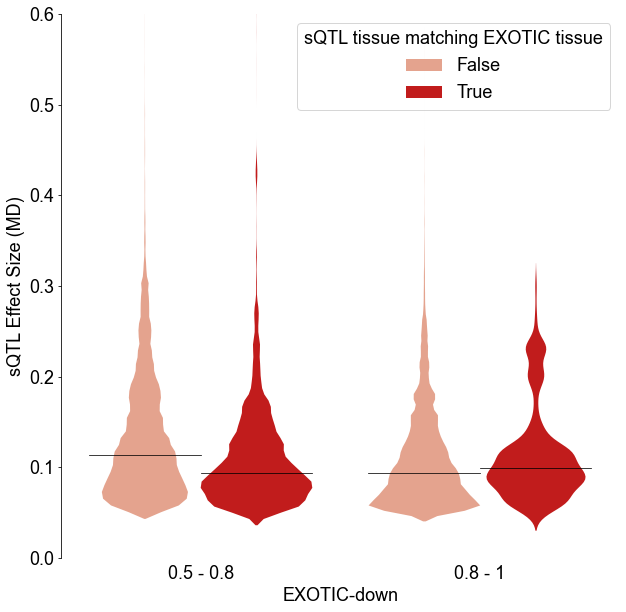

In [20]:

# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'down'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test


# test_boxenplot = test.loc[(~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'md_bins', 'md', 'Match_tissues']]
f, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size' : 18})
# print(test_boxenplot[['EXOTIC_bins_up', 'md']].pivot(columns='EXOTIC_bins_up', values='md').describe())
# for col in test_boxenplot.EXOTIC_bins_up.unique().tolist():
#     print(col, test_boxenplot[['EXOTIC_bins_up', 'md']].pivot(columns='EXOTIC_bins_up', values='md')[col].quantile(0.95))

# print(test.groupby(['EXOTIC_bins', '']))

test = test.rename({'EXOTIC_bins_{}'.format(min_max) : 'EXOTIC-{}'.format(min_max), 'Match_tissues' : 'sQTL tissue matching EXOTIC tissue'}, axis=1)
data = test
data['sQTL tissue matching EXOTIC tissue'] = data['sQTL tissue matching EXOTIC tissue'].astype(str)


b = sns.violinplot(data=data, x='EXOTIC-{}'.format(min_max), y='md', hue='sQTL tissue matching EXOTIC tissue', showfliers=False, linewidth=0, palette=['#F39B7FFF', '#DC0000FF'])

plt.ylim(0,0.6)

hline = [
    [0.05,0.25],
    [0.25,0.45],
    [0.55,0.75],
    [0.75,0.95]
]

i = 0
for j, bin in enumerate(data['EXOTIC-{}'.format(min_max)].unique()):
    print(bin)
    for match in data['sQTL tissue matching EXOTIC tissue'].unique():
        print(match)

        m = data.loc[(data['EXOTIC-{}'.format(min_max)] == bin)  & (data['sQTL tissue matching EXOTIC tissue'] == match), 'md'].median()
        print(m)
        
        plt.axhline(xmin=hline[i][0], xmax=hline[i][1], y=m, color='black', lw=0.75)
        i+=1

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0)
ax.xaxis.set_ticks_position('none') 



x = 'EXOTIC-{}'.format(min_max)
y = 'md'
hue = 'sQTL tissue matching EXOTIC tissue'
hue_order=['False', 'True']
box_pairs=[
    (("0.5 - 0.8", 'True'), ("0.5 - 0.8", 'False')),
    (("0.8 - 1", "True"), ("0.8 - 1", 'False')),
    (("0.5 - 0.8", 'True'), ("0.8 - 1", 'True')),
    (("0.5 - 0.8", 'False'), ("0.8 - 1", 'False')),
    ]

medians = data[[x, y, hue]].groupby([x, hue])[y].median().sort_index(ascending=True).values.tolist()
vertical_offset = data[y].median() * 0.05 # offset from median for display



ax.set_ylabel('sQTL Effect Size (MD)')

# for j, xtick in enumerate(b.get_xticks()):
#     print(j, xtick)
#     if j <0:
#         color='grey'
#     else:
#         color='w'
#     b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 2), 
#             horizontalalignment='center',size='medium',color='black',weight='semibold')

# add_stat_annotation(b, data=data, x=x, y=y, hue=hue,
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='inside', verbose=2)


0.5 - 0.8
False
0.108905669872139
True
0.103425728391201
0.8 - 1
False
0.0893764731976699
True
0.127781229480947


Text(0, 0.5, 'sQTL Effect Size (MD)')

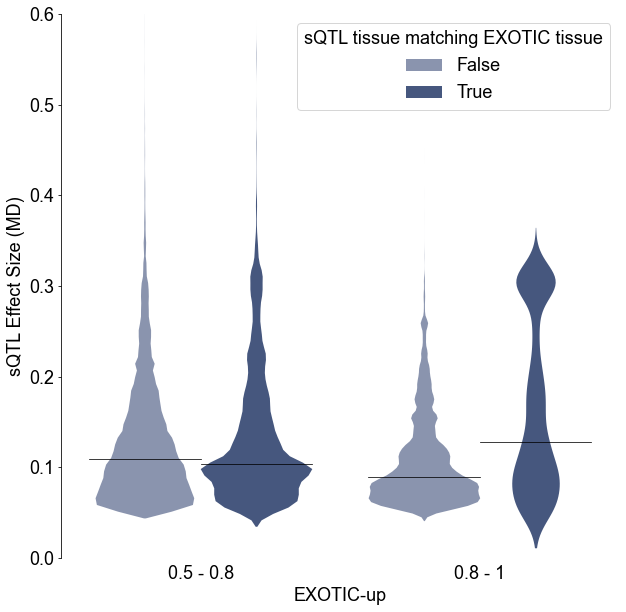

In [21]:

# COMPUTE BINS
# r = np.arange(0.5,1.05,0.05)
r = [0.5,0.8,1]
bins = r
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]

min_max = 'up'

# COMPUTE BINS COLUMNS

test = merge_exotic_sqtl.drop_duplicates(subset=['MAP', 'ENST', 'snpId', 'Tissue'])[['Tissue', 'EXOTIC_tissues_{}'.format(min_max), 'EXOTIC_{}'.format(min_max), 'LD', 'md']].explode('EXOTIC_tissues_{}'.format(min_max))
test["EXOTIC_bins_{}".format(min_max)] = pd.cut(test["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

test.loc[test['Tissue'] == test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = True
test.loc[test['Tissue'] != test['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissues'] = False

# COMPUTE BINS
bins = [0,0.05,0.1,0.2,1]
labels = bins.copy()
labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
test['md_bins'] = pd.cut(test['md'], bins=bins, labels=labels_ratio, include_lowest=True)

test


# test_boxenplot = test.loc[(~test['md_bins'].isin(['0 - 0.05', '0.1 - 0.2'])),  ['EXOTIC_bins_up', 'md_bins', 'md', 'Match_tissues']]
f, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size' : 18})
# print(test_boxenplot[['EXOTIC_bins_up', 'md']].pivot(columns='EXOTIC_bins_up', values='md').describe())
# for col in test_boxenplot.EXOTIC_bins_up.unique().tolist():
#     print(col, test_boxenplot[['EXOTIC_bins_up', 'md']].pivot(columns='EXOTIC_bins_up', values='md')[col].quantile(0.95))
test = test.rename({'EXOTIC_bins_{}'.format(min_max) : 'EXOTIC-{}'.format(min_max), 'Match_tissues' : 'sQTL tissue matching EXOTIC tissue'}, axis=1)
data = test
data['sQTL tissue matching EXOTIC tissue'] = data['sQTL tissue matching EXOTIC tissue'].astype(str)

b = sns.violinplot(data=data, x='EXOTIC-{}'.format(min_max), y='md', hue='sQTL tissue matching EXOTIC tissue', showfliers=False, linewidth=0, palette=['#8491B4FF', '#3C5488FF'])

plt.ylim(0,0.6)

hline = [
    [0.05,0.25],
    [0.25,0.45],
    [0.55,0.75],
    [0.75,0.95]
]

i = 0
for j, bin in enumerate(data['EXOTIC-{}'.format(min_max)].unique()):
    print(bin)
    for match in data['sQTL tissue matching EXOTIC tissue'].unique():
        print(match)

        m = data.loc[(data['EXOTIC-{}'.format(min_max)] == bin)  & (data['sQTL tissue matching EXOTIC tissue'] == match), 'md'].median()
        print(m)
        
        plt.axhline(xmin=hline[i][0], xmax=hline[i][1], y=m, color='black', lw=0.75)
        i+=1

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0)
ax.xaxis.set_ticks_position('none') 



x = 'EXOTIC-{}'.format(min_max)
y = 'md'
hue = 'sQTL tissue matching EXOTIC tissue'
hue_order=['False', 'True']
box_pairs=[
    (("0.5 - 0.8", 'True'), ("0.5 - 0.8", 'False')),
    (("0.8 - 1", "True"), ("0.8 - 1", 'False')),
    (("0.5 - 0.8", 'True'), ("0.8 - 1", 'True')),
    (("0.5 - 0.8", 'False'), ("0.8 - 1", 'False')),
    ]

medians = data[[x, y, hue]].groupby([x, hue])[y].median().sort_index(ascending=True).values.tolist()
vertical_offset = data[y].median() * 0.05 # offset from median for display



ax.set_ylabel('sQTL Effect Size (MD)')

# for j, xtick in enumerate(b.get_xticks()):
#     print(j, xtick)
#     if j <0:
#         color='grey'
#     else:
#         color='w'
#     b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 2), 
#             horizontalalignment='center',size='medium',color='black',weight='semibold')

# add_stat_annotation(b, data=data, x=x, y=y, hue=hue,
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='inside', verbose=2)


In [15]:
data

,Tissue,EXOTIC_tissues_up,EXOTIC_up,LD,md,EXOTIC-up,sQTL tissue matching EXOTIC tissue,md_bins
0,Testis,Adipose - Subcutaneous,0.578349,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
0,Testis,Adipose - Visceral (Omentum),0.578349,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
0,Testis,Adrenal Gland,0.578349,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
0,Testis,Artery - Aorta,0.578349,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
0,Testis,Artery - Coronary,0.578349,0.016791,0.097385,0.5 - 0.8,False,0.05 - 0.1
...,...,...,...,...,...,...,...,...
5048975,Skin - Sun Exposed (Lower leg),Muscle - Skeletal,0.574443,0.027780,0.058280,0.5 - 0.8,False,0.05 - 0.1
5048976,Skin - Sun Exposed (Lower leg),Muscle - Skeletal,0.574443,0.027780,0.058280,0.5 - 0.8,False,0.05 - 0.1
5048977,Skin - Sun Exposed (Lower leg),Muscle - Skeletal,0.574443,0.027780,0.058280,0.5 - 0.8,False,0.05 - 0.1
5048978,Skin - Sun Exposed (Lower leg),Muscle - Skeletal,0.574443,0.027780,0.057091,0.5 - 0.8,False,0.05 - 0.1


In [ ]:
plt.figure(figsize=(20,15))
sns.boxenplot(data=test, x='EXOTIC_bins_up', y='md', hue='Match_tissues')

In [ ]:
plt.figure(figsize=(20,15))
sns.boxenplot(data=test, x='EXOTIC_bins_up', y='LD', hue='Match_tissues')

In [ ]:
pd.options.display.max_rows = 100
merge_exotic_sqtl.loc[0].T

In [ ]:
# for min_max, r in zip(['min', 'max'], [np.arange(0,0.51,0.01), np.arange(0.5,1.01,0.01)]):
for min_max in ['down', 'up']:

    print(min_max)

    # COMPUTE BINS
    bins = np.arange(0,0.51,0.01)
    labels = bins.copy()
    labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
    
    
    # LOAD FILE
    merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore.parquet')


    # COMPUTE BINS COLUMNS
#     merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)
        
    # COMPUTE NB sQTL & GENES
    exotic_sqtl_all = pd.concat(
        [merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'symbol', ]].drop_duplicates()[['EXOTIC_bins_{}'.format(min_max), 'snpId']].groupby(['EXOTIC_bins_{}'.format(min_max)]).count(),
        merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'symbol' ]].drop_duplicates().groupby(['EXOTIC_bins_{}'.format(min_max)]).count()],
        axis=1
    ).rename({'snpId': 'snpId_total'}, axis=1)
    exotic_sqtl_all['Ratio_sQTL_total'] = exotic_sqtl_all['snpId_total'] / exotic_sqtl_all['symbol']

    
    # LOAD FILE WITH MERGE ON TISSUES
    merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format(min_max))
    
#     merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

    # COMPUTE NB sQTL & GENES ON TISSUES
    exotic_sqtl_on_tissues = pd.concat(
        [merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'symbol' ]].drop_duplicates()[['EXOTIC_bins_{}'.format(min_max), 'snpId']].groupby(['EXOTIC_bins_{}'.format(min_max)]).count(),
        merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'symbol' ]].drop_duplicates().groupby(['EXOTIC_bins_{}'.format(min_max)]).count()],
        axis=1
    )
    exotic_sqtl_on_tissues['Ratio_sQTL'] = exotic_sqtl_on_tissues['snpId'] / exotic_sqtl_on_tissues['symbol']

#     # CONCAT HORIZONTALLY
    concat_final = pd.concat([exotic_sqtl_on_tissues, exotic_sqtl_all], axis=1).dropna()
    concat_final['Ratio'] = concat_final['snpId'] / concat_final['snpId_total']
    concat_final['Enrichment'] = concat_final['Ratio_sQTL'] / concat_final['Ratio_sQTL_total']
    concat_final = concat_final.reset_index()
    
#     # COMPUTE CUMSUM & BIN START
    if min_max == 'min':
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bins_{}'.format(min_max)].apply(lambda r: r.split(' - ')[0])
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bin_start'].astype(float)
        concat_final = concat_final.sort_values(by='EXOTIC_bin_start', ascending=False)
        concat_final['Cumsum_total'] = (concat_final['snpId_total'].cumsum() / concat_final['snpId_total'].sum()) * 100
        concat_final['Cumsum_tissues'] = (concat_final['snpId'].cumsum() / concat_final['snpId'].sum()) * 100
        concat_final = concat_final.sort_values(by='EXOTIC_bin_start', ascending=True)
    else:
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bins_{}'.format(min_max)].apply(lambda r: r.split(' - ')[1])
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bin_start'].astype(float)
        concat_final['Cumsum_total'] = (concat_final['snpId_total'].cumsum() / concat_final['snpId_total'].sum()) * 100
        concat_final['Cumsum_tissues'] = (concat_final['snpId'].cumsum() / concat_final['snpId'].sum()) * 100
    
    # OUTPUT
    concat_final.to_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC_modified-{}_Rdata.xlsx'.format(min_max), index=False)

    print(concat_final[['EXOTIC_bins_{}'.format(min_max), 'Ratio']])

In [ ]:
pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-{}_Rdata.xlsx'.format('max'))


## Data Fig X - Compute sQTL ratio TS/Total for each tissue


In [ ]:
for min_max, r in zip(['min', 'max'], [np.arange(0,0.51,0.01), np.arange(0.5,1.01,0.01)]):
    print(min_max)

    # COMPUTE BINS
    bins = r
    labels = bins.copy()
    labels_ratio = [str(round(labels[j], 3)) + " - " + str(round(labels[j + 1], 3)) for j in range(len(labels) - 1)]
    
    
    # LOAD FILE
    merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format(min_max))
    
    merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

    
    # COMPUTE NB sQTL & GENES
    exotic_sqtl_all = pd.concat(
        [merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'Tissue']].drop_duplicates()[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'Tissue']].groupby(['EXOTIC_bins_{}'.format(min_max), 'Tissue']).count(),
        merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'Tissue']].drop_duplicates().groupby(['EXOTIC_bins_{}'.format(min_max), 'Tissue']).count()],
        axis=1
    ).rename({'snpId': 'snpId_total'}, axis=1)

    # LOAD FILE WITH MERGE ON TISSUES
    merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_all_genes_corrected.parquet')
    
    merge_exotic_sqtl["EXOTIC_bins_{}".format(min_max)] = pd.cut(merge_exotic_sqtl["EXOTIC_{}".format(min_max)], bins=bins, labels=labels_ratio, include_lowest=True)

    
    # COMPUTE NB sQTL & GENES ON TISSUES
    exotic_sqtl_on_tissues = pd.concat(
        [merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'Tissue' ]].drop_duplicates()[['EXOTIC_bins_{}'.format(min_max), 'snpId', 'Tissue']].groupby(['EXOTIC_bins_{}'.format(min_max), 'Tissue']).count(),
        merge_exotic_sqtl[['EXOTIC_bins_{}'.format(min_max), 'Tissue' ]].drop_duplicates().groupby(['EXOTIC_bins_{}'.format(min_max), 'Tissue']).count()],
        axis=1
    )

    # CONCAT HORIZONTALLY
    concat_final = pd.concat([exotic_sqtl_on_tissues, exotic_sqtl_all], axis=1).dropna()
    concat_final['Ratio'] = concat_final['snpId'] / concat_final['snpId_total']
    concat_final = concat_final.reset_index()

    # COMPUTE BIN START
    if min_max == 'min':
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bins_{}'.format(min_max)].apply(lambda r: r.split(' - ')[0])
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bin_start'].astype(float)
    else:
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bins_{}'.format(min_max)].apply(lambda r: r.split(' - ')[1])
        concat_final['EXOTIC_bin_start'] = concat_final['EXOTIC_bin_start'].astype(float)
    
    # REORDER TISSUES
    concat_final['Tissue'] = concat_final['Tissue'].astype('category')
    concat_final['Tissue'] = concat_final['Tissue'].cat.reorder_categories(concat_final.groupby('Tissue')['snpId'].sum().sort_values(ascending=False).reset_index()['Tissue'].values.tolist())
    concat_final = concat_final.sort_values(by='Tissue')
    
    
    # DIVIDE BY GROUPS OF TISSUE TO PRODUCE FIGURE
    group_nb = 4
    limit = round(concat_final.Tissue.nunique() / group_nb, 0)
    group_list = ['Group{}'.format(j+1) for j in range(group_nb)]
    # tmp_d = {t:'Group{}'.format(int(j)+1)  if j % limit == 0 }
    tmp_d = dict()
    i = 0
    for j,t in enumerate(concat_final.Tissue.unique().tolist()):
        tmp_d[t] = group_list[i]

        if j % limit == 0 and j != 0:
            print(j, limit)
            i+=1
    concat_final['Group'] = concat_final['Tissue'].map(tmp_d)
    
    # OUTPUT
    concat_final.to_parquet('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_detailed_EXOTIC-modified_{}_Rdata.parquet'.format(min_max), index=False)

## Fig X - Cumsum all sQTL & TS for EXOTIC-max

In [ ]:
concat_final

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 22})

concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC_modified-up_Rdata.xlsx')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_total", alpha=0.8, align='edge', width=-0.02, color='#7E6148FF')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_tissues", alpha=0.8, align='edge', width=0.02, color='#B09C85FF')
plt.axhline(y=5, lw=2, color='grey', ls='--')
locs, labels = plt.xticks()
plt.xlabel('EXOTIC-max score')
plt.ylabel('Cumulative sum of all sQTL & tissue-specific sQTL')
ax.set_xticks(np.arange(min(concat_final.EXOTIC_bin_start), max(concat_final.EXOTIC_bin_start)+0.05, 0.05))


In [ ]:
f, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 22})

concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-max_Rdata.xlsx')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_total", alpha=0.8, align='edge', width=-0.02, color='#7E6148FF')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_tissues", alpha=0.8, align='edge', width=0.02, color='#B09C85FF')
plt.axhline(y=5, lw=2, color='grey', ls='--')
locs, labels = plt.xticks()
plt.xlabel('EXOTIC-max score')
plt.ylabel('Cumulative sum of all sQTL & tissue-specific sQTL')
ax.set_xticks(np.arange(min(concat_final.EXOTIC_bin_start), max(concat_final.EXOTIC_bin_start)+0.05, 0.05))


## Fig X - Cumsum all sQTL & TS for EXOTIC-min

In [ ]:
concat_final

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 22})

concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC_modified-down_Rdata.xlsx')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_total", alpha=0.8, align='edge', width=-0.02, color='#7E6148FF')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_tissues", alpha=0.8, align='edge', width=0.02, color='#B09C85FF')
plt.axhline(y=5, lw=2, color='grey', ls='--')
locs, labels = plt.xticks()
plt.xlabel('EXOTIC-min score')
plt.ylabel('Cumulative sum of all sQTL & tissue-specific sQTL')
ax.set_xticks(np.arange(min(concat_final.EXOTIC_bin_start), max(concat_final.EXOTIC_bin_start)+0.05, 0.05))


In [ ]:
f, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 22})

concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-min_Rdata.xlsx')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_total", alpha=0.8, align='edge', width=-0.02, color='#7E6148FF')
plt.bar(data=concat_final, x="EXOTIC_bin_start", height="Cumsum_tissues", alpha=0.8, align='edge', width=0.02, color='#B09C85FF')
plt.axhline(y=5, lw=2, color='grey', ls='--')
locs, labels = plt.xticks()
plt.xlabel('EXOTIC-min score')
plt.ylabel('Cumulative sum of all sQTL & tissue-specific sQTL')
ax.set_xticks(np.arange(min(concat_final.EXOTIC_bin_start), max(concat_final.EXOTIC_bin_start)+0.05, 0.05))


## Fig X - Nb sQTL & TS for EXOTIC-min

In [ ]:
concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-min_Rdata.xlsx')

sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(figsize=(10,10))
data = concat_final.reset_index()
ax1_ = ax.bar(data.EXOTIC_bin_start.values, data.snpId_total.values,
#        yerr=error,
       align='edge',
       
       color='#8491B4FF',
       width=-0.020
      )
ax2 = ax.twinx()
ax2_ = ax2.bar(data.EXOTIC_bin_start.values, data.snpId.values, color='#91D1C2FF', align='edge', width=0.02)
ax.yaxis.label.set_color('#8491B4FF')
ax2.yaxis.label.set_color('#91D1C2FF')

# ax.set_xticklabels(['0', '0.05', '0.1'])
ax.set_xticks(np.arange(min(data.EXOTIC_bin_start), max(data.EXOTIC_bin_start)+0.05, 0.05))

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors='#8491B4FF', **tkw)
ax2.tick_params(axis='y', colors='#91D1C2FF', **tkw)
ax.set_ylabel('All sQTLs')
ax.set_xlabel('EXOTIC-max score')
ax2.set_ylabel('Tissue-specific sQTLs')
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)


## Fig X - Nb sQTL & TS for EXOTIC-min

In [ ]:
pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-max_Rdata.xlsx')

In [ ]:
concat_final = pd.read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-max_Rdata.xlsx')

sns.set_context('paper', font_scale=2)
f, ax = plt.subplots(figsize=(10,10))
data = concat_final.reset_index()
ax1_ = ax.bar(data.EXOTIC_bin_start.values, data.snpId_total.values,
#        yerr=error,
       align='edge',
       
       color='#8491B4FF',
       width=-0.020
      )
ax2 = ax.twinx()
ax2_ = ax2.bar(data.EXOTIC_bin_start.values, data.snpId.values, color='#91D1C2FF', align='edge', width=0.02)
ax.yaxis.label.set_color('#8491B4FF')
ax2.yaxis.label.set_color('#91D1C2FF')

ax.set_xticks(np.arange(min(data.EXOTIC_bin_start), max(data.EXOTIC_bin_start)+0.05, 0.05))


tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors='#8491B4FF', **tkw)
ax2.tick_params(axis='y', colors='#91D1C2FF', **tkw)
ax.set_ylabel('All sQTLs')
ax.set_xlabel('EXOTIC-max score')
ax2.set_ylabel('Tissue-specific sQTLs')
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
# plt.title('Up')

## Data Fig X - Compute cutoff sQTL for EXOTIC-min & max

In [ ]:
for min_max in ['up', 'down']:
    print(min_max)
    merge_exotic_sqtl = pd.read_parquet('/gstock/EXOTIC/data/QTL/sQTL_ENST_modified_zscore_tissues_{}.parquet'.format(min_max))
    cutoff_sqtl = merge_exotic_sqtl[['EXOTIC_{}'.format(min_max), 'Tissue']].groupby('Tissue').max()
    cutoff_sqtl.to_excel('/gstock/EXOTIC/data/QTL/sQTL_cutoff_EXOTIC_modified_{}_Rdata.xlsx'.format(min_max))

# EXOTIC & pext distribution

## Compute stuff

In [ ]:
test = exotic_processed[['symbol', 'MAP', 'EXOTIC_min', 'EXOTIC_tissues_corrected_min', 'EXOTIC_pext_associated_min', 'EXOTIC_max', 'EXOTIC_tissues_corrected_max', 'EXOTIC_pext_associated_max']]
test['pext_EXOTIC_min_median'] = test['EXOTIC_pext_associated_min'].apply(np.median)
test['pext_EXOTIC_max_median'] = test['EXOTIC_pext_associated_max'].apply(np.median)
test['pext_min_max_diff'] = test['pext_EXOTIC_max_median'] - test['pext_EXOTIC_min_median']
test

## Fig X - Diff EXOTIC-min & max 

In [ ]:
test = exotic_processed[['symbol', 'MAP', 'EXOTIC_min', 'EXOTIC_tissues_corrected_min', 'EXOTIC_pext_associated_min', 'EXOTIC_max', 'EXOTIC_tissues_corrected_max', 'EXOTIC_pext_associated_max']]
test['EXOTIC_min_max_diff'] = test['EXOTIC_max'] - test['EXOTIC_min']
plt.figure(figsize=(8,12))
b = sns.boxenplot(data=test, y='EXOTIC_min_max_diff', color='#3C5488FF')
plt.ylabel('EXOTIC-max  -  EXOTIC-min')
b.spines['right'].set_linewidth(0)
b.spines['top'].set_linewidth(0)
b.spines['bottom'].set_linewidth(0)
# b.a.set_xticks([])
b.xaxis.set_ticks_position('none') 
plt.ylim(0.4,1)

data = test
x, y = 'MAP', 'EXOTIC_min_max_diff'
medians = [data[y].median()]
vertical_offset = data[y].median() * 0.02 # offset from median for display
print(medians)

for j, xtick in enumerate(b.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 3), 
            horizontalalignment='center',size='medium',color=color,weight='semibold')


## Fig X - Diff pext EXOTIC-min & max 

In [ ]:
test = exotic_processed[['symbol', 'MAP', 'EXOTIC_min', 'EXOTIC_tissues_corrected_min', 'EXOTIC_pext_associated_min', 'EXOTIC_max', 'EXOTIC_tissues_corrected_max', 'EXOTIC_pext_associated_max']]
test['pext_EXOTIC_min_median'] = test['EXOTIC_pext_associated_min'].apply(np.median)
test['pext_EXOTIC_max_median'] = test['EXOTIC_pext_associated_max'].apply(np.median)
test['pext_min_max_diff'] = test['pext_EXOTIC_max_median'] - test['pext_EXOTIC_min_median']

plt.figure(figsize=(8,12))
b = sns.boxenplot(data=test, y='pext_min_max_diff', color='#3C5488FF')
plt.ylabel('pext EXOTIC-max  -  pext EXOTIC-min')
b.spines['right'].set_linewidth(0)
b.spines['top'].set_linewidth(0)
b.spines['bottom'].set_linewidth(0)
# b.a.set_xticks([])
b.xaxis.set_ticks_position('none') 
plt.ylim(0,1)

data = test
x, y = 'MAP', 'pext_min_max_diff'
medians = [data[y].median()]
vertical_offset = data[y].median() * 0.02 # offset from median for display
print(medians)

for j, xtick in enumerate(b.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 3), 
            horizontalalignment='center',size='medium',color=color,weight='semibold')


## Fig X - Distribution pext + EXOTIC-min

In [ ]:
test = exotic_processed[['symbol', 'MAP', 'EXOTIC_min', 'EXOTIC_tissues_corrected_min', 'EXOTIC_pext_associated_min']]
test['pext_EXOTIC_min_median'] = test['EXOTIC_pext_associated_min'].apply(np.median)
test = test[['MAP', 'EXOTIC_min', 'pext_EXOTIC_min_median',]].melt(id_vars='MAP', value_vars=['EXOTIC_min', 'pext_EXOTIC_min_median'])

f, ax=  plt.subplots(figsize=(8,12))
b = sns.boxenplot(data=test, x='variable', y='value', color='#3C5488FF')
# plt.ylabel('pext EXOTIC-max  -  pext EXOTIC-min')
plt.xlabel('')
plt.ylabel('')
b.spines['right'].set_linewidth(0)
b.spines['top'].set_linewidth(0)
# b.spines['bottom'].set_linewidth(0)
# b.a.set_xticks([])
b.xaxis.set_ticks_position('none') 
# plt.ylim(0,1)

data = test
x, y = 'MAP', 'value'
medians = data.groupby('variable')[y].median().values.tolist()
vertical_offset = data[y].median() * 0.02 # offset from median for display
print(medians)

for j, xtick in enumerate(b.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 3), 
            horizontalalignment='center',size='medium',color=color,weight='semibold')


## Fig X - Distribution pext + EXOTIC-max

In [ ]:
test = exotic_processed[['symbol', 'MAP', 'EXOTIC_max', 'EXOTIC_tissues_corrected_max', 'EXOTIC_pext_associated_max']]
test['pext_EXOTIC_max_median'] = test['EXOTIC_pext_associated_max'].apply(np.median)
test = test[['MAP', 'EXOTIC_max', 'pext_EXOTIC_max_median',]].melt(id_vars='MAP', value_vars=['EXOTIC_max', 'pext_EXOTIC_max_median'])

f, ax=  plt.subplots(figsize=(8,12))
b = sns.boxenplot(data=test, x='variable', y='value', color='#3C5488FF')
# plt.ylabel('pext EXOTIC-max  -  pext EXOTIC-min')
plt.xlabel('')
plt.ylabel('')
b.spines['right'].set_linewidth(0)
b.spines['top'].set_linewidth(0)
# b.spines['bottom'].set_linewidth(0)
# b.a.set_xticks([])
b.xaxis.set_ticks_position('none') 
# plt.ylim(0,1)

data = test
x, y = 'MAP', 'value'
medians = data.groupby('variable')[y].median().values.tolist()
vertical_offset = data[y].median() * 0.02 # offset from median for display
print(medians)

for j, xtick in enumerate(b.get_xticks()):
    if j <0:
        color='grey'
    else:
        color='w'
    b.text(xtick,medians[xtick] + vertical_offset,round(medians[xtick], 3), 
            horizontalalignment='center',size='medium',color=color,weight='semibold')
